$X_{n} → $muestra especifica

modelo es la funcion que guarda nuestro aprendizaje

### Modelo computacional de una neurona.

### **Funciones  de activacion**

- identidad
- step -> Reales negativos 0, Reales positivos y cero 1
- Sigmoide -> mapea los reales entre 0 y 1
- RelU mapear reales entre 0 e $∞ $

### **Funciones de costo**

supervisa el proceso de aprendizaje, mide el desempeño del modelo

- entropia cruzada $->$ medir divergencia entre dos distribuciones de probabilidad 

Funcion de costo $->$ promedio funcion de perdida


Sacar gradiente del perceptron. latex

Funciones de activacion derivadas, continuidad

Funciones de costo para tareas de clasificacion - 2

Algoritmo del perceptron.









## tensorflow practica codigo

In [1]:
import tensorflow as tf

In [2]:
x=tf.ones(shape=(1,2))
print(x)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


In [3]:
x=tf.zeros(shape=(1,3))
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>

In [4]:
x=tf.random.normal(shape=(3,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.43056104],
       [1.2020345 ],
       [0.12082446]], dtype=float32)>

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.30428076],
       [ 1.2251312 ],
       [-2.0862436 ]], dtype=float32)>

In [6]:
v[0,0].assign(3)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 3.       ],
       [ 1.2251312],
       [-2.0862436]], dtype=float32)>

In [7]:
v.assign_add(tf.ones(shape=(3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 4.       ],
       [ 2.225131 ],
       [-1.0862436]], dtype=float32)>

In [8]:
import matplotlib.pyplot as plt 

In [9]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.sin(x)

dy_dx = tape.gradient(y,x)  

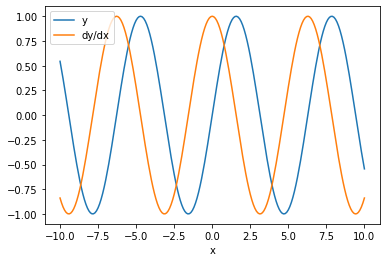

In [10]:

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

Tarea: doble derivada tanhiperbolica= sen/cos

In [11]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  with tf.GradientTape() as tapeg:
    tapeg.watch(x)
    y = tf.tanh(x)
  dy_dx= tapeg.gradient(y,x)  
d2y_dx2 = tape.gradient(dy_dx,x)


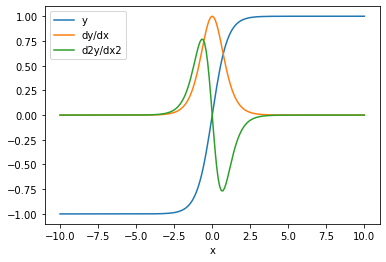

In [12]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.plot(x, d2y_dx2, label='d2y/dx2')
plt.legend()
_ = plt.xlabel('x')

Dataset

In [13]:
import numpy as np 

num_samples_per_class = 1000 

negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov=[[1.,0.5],
                                                      [0.5,1]],
                                                 size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[1,0.5],
                                                 cov=[[1.,0.5],
                                                      [0.5,1]],
                                                 size=num_samples_per_class)

In [14]:
X = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [15]:
y = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
               np.ones((num_samples_per_class, 1), dtype="float32")))

In [16]:
X.shape

(2000, 2)

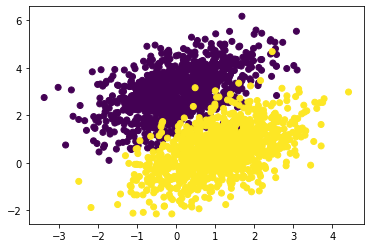

In [17]:
import matplotlib.pyplot as plt 

plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [18]:
shufflers = np.random.permutation(len(X))
X = X[shufflers]
y = y[shufflers]

In [19]:
perc = 0.8
total = len(X)
X_train, y_train = X[:int(total*perc)],y[:int(total*perc)]
X_test, y_test = X[int(total*perc):],y[int(total*perc):]

In [20]:
import tensorflow as tf

class Model:
    def __init__(self, input_dim, output_dim):
        self.W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim,output_dim))) 
        self.b = tf.Variable(initial_value= tf.random.uniform(shape=(output_dim,))) 

    def __call__(self,X):
        return tf.matmul(X,self.W) + self.b 


In [21]:
model = Model(2,1)

In [22]:
model.b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7154834], dtype=float32)>

## Funcion de costo

In [23]:
def square_loss(y,y_pred):
    per_samples_lasses = tf.square(y-y_pred)
    return tf.reduce_mean(per_samples_lasses)

## Training

In [24]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[model.W, model.b]) 
    model.W.assign_sub(learning_rate*grad_loss_wrt_W)
    model.b.assign_sub(learning_rate*grad_loss_wrt_b)
    return loss

In [25]:
for step in range(40):
    loss = training_step(X_train,y_train)
    print(f'Step: {step}, loss: {loss}')

Step: 0, loss: 2.263054132461548
Step: 1, loss: 0.2909236252307892
Step: 2, loss: 0.11807039380073547
Step: 3, loss: 0.09441074728965759
Step: 4, loss: 0.08612323552370071
Step: 5, loss: 0.08104494214057922
Step: 6, loss: 0.07739247381687164
Step: 7, loss: 0.07458434998989105
Step: 8, loss: 0.07233136892318726
Step: 9, loss: 0.07047086954116821
Step: 10, loss: 0.06890524923801422
Step: 11, loss: 0.06757204234600067
Step: 12, loss: 0.06642841547727585
Step: 13, loss: 0.06544307619333267
Step: 14, loss: 0.06459184736013412
Step: 15, loss: 0.06385532021522522
Step: 16, loss: 0.06321743130683899
Step: 17, loss: 0.06266465783119202
Step: 18, loss: 0.06218550726771355
Step: 19, loss: 0.061770062893629074
Step: 20, loss: 0.061409834772348404
Step: 21, loss: 0.06109745055437088
Step: 22, loss: 0.06082655116915703
Step: 23, loss: 0.060591623187065125
Step: 24, loss: 0.060387879610061646
Step: 25, loss: 0.060211181640625
Step: 26, loss: 0.06005793437361717
Step: 27, loss: 0.05992504209280014
Ste

In [26]:
model.W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.184783  ],
       [-0.23201516]], dtype=float32)>

In [27]:
model.b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.80246127], dtype=float32)>

In [28]:
y_pred = model(X_test) > 0.5
y_pred = np.array(y_pred)


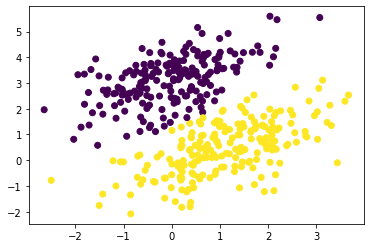

In [29]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,0])

In [30]:
acc = sum((y_test==y_pred))/len(y_test)
acc

array([0.9825])

Tarea
Sigmoide


In [31]:
shufflers = np.random.permutation(len(X))
X = X[shufflers]
y = y[shufflers]

In [32]:
perc = 0.8
total = len(X)
X_train, y_train = X[:int(total*perc)],y[:int(total*perc)]
X_test, y_test = X[int(total*perc):],y[int(total*perc):]

In [33]:
class Model:
    def __init__(self, input_dim, output_dim):
        self.W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim,output_dim))) 
        self.b = tf.Variable(initial_value= tf.random.uniform(shape=(output_dim,))) 

    def __call__(self,X):
        return 1/(1+(tf.exp(-1*(tf.matmul(X,self.W) + self.b)))) ## con funcion de activacion sigmoide

In [34]:
model1 = Model(2,2)## primera capa
model2= Model(2,1)##segunda capa

In [35]:
model.b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.80246127], dtype=float32)>

In [36]:
learning_rate = 0.8
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model1(inputs) ## Capa 1
        predictions2= model2(predictions) ## Capa 2
        loss = square_loss(targets,predictions2)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[model2.W, model2.b]) 
    model2.W.assign_sub(learning_rate*grad_loss_wrt_W)
    model2.b.assign_sub(learning_rate*grad_loss_wrt_b)
    return loss

In [37]:
for step in range(40):
    loss = training_step(X_train,y_train)
    print(f'Step: {step}, loss: {loss}')

Step: 0, loss: 0.36469900608062744
Step: 1, loss: 0.35025832056999207
Step: 2, loss: 0.33495211601257324
Step: 3, loss: 0.3194090723991394
Step: 4, loss: 0.30445969104766846
Step: 5, loss: 0.290963739156723
Step: 6, loss: 0.27957114577293396
Step: 7, loss: 0.27054867148399353
Step: 8, loss: 0.2637745141983032
Step: 9, loss: 0.25887635350227356
Step: 10, loss: 0.2554023265838623
Step: 11, loss: 0.2529391348361969
Step: 12, loss: 0.25116121768951416
Step: 13, loss: 0.24983413517475128
Step: 14, loss: 0.24879798293113708
Step: 15, loss: 0.24794749915599823
Step: 16, loss: 0.247214674949646
Step: 17, loss: 0.246556356549263
Step: 18, loss: 0.24594520032405853
Step: 19, loss: 0.24536417424678802
Step: 20, loss: 0.24480251967906952
Step: 21, loss: 0.24425359070301056
Step: 22, loss: 0.24371325969696045
Step: 23, loss: 0.24317893385887146
Step: 24, loss: 0.24264900386333466
Step: 25, loss: 0.24212247133255005
Step: 26, loss: 0.24159874022006989
Step: 27, loss: 0.24107740819454193
Step: 28, lo

In [38]:
y_pred = model2(X_test) > 0.5
y_pred = np.array(y_pred)

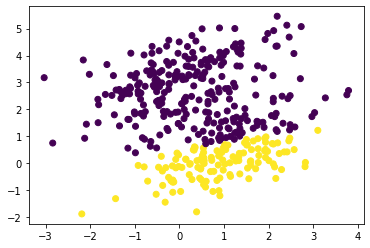

In [39]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,0])

In [40]:
acc = sum((y_test==y_pred))/len(y_test)
acc

array([0.8175])

**Tareas**
* ¿Qué tipo de entrenamiento se acabo de hacer?, ¿mini-batch?, ¿batch?
* Plotear la curva de decisión

Se uso el tipo batch ya que se separó una muestra para entrenamiento y otra para probar el modelo, mientra que el mini batch es que se cogen varias muestras y se prueban todas

In [42]:
import sklearn.metrics as sklm

sklm.roc_curve(y_pred,y_test)

(array([0.        , 0.26739927, 1.        ]),
 array([0., 1., 1.]),
 array([2., 1., 0.], dtype=float32))

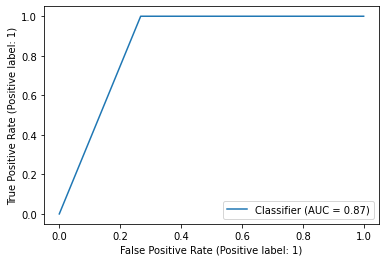

In [43]:
sklm.RocCurveDisplay.from_predictions(y_pred,y_test)